In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set darkgrid style from seaborn

In [288]:
sns.set()  # default value darkgrid  NOT: This function may be removed in the future.

# or

sns.set_style("darkgrid")  # Set the parameters that control the general style of the plots.

Bar plots

In [289]:
income = [100, 80, 150, 48, 52, 69, 88]
expense = [30, 100, 100, 20, 75, 50, 28]
index = ['A', 'B', 'C','D', 'E', 'F', 'G']
df = pd.DataFrame({'income': income,'expense': expense}, index=index)
df.head()

,income,expense
A,100,30
B,80,100
C,150,100
D,48,20
E,52,75


# 2. Make a bar plot

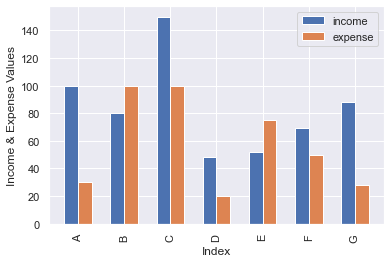

In [290]:
# Drawing with Matplotlib Object Oriented Method

fig, ax=plt.subplots()

# set width of bar
barWidth = 0.30

# Bar number
brnum = np.arange(len(index))

# Make the plot
ax.bar(brnum - barWidth/2, income, barWidth, label="income")
ax.bar(brnum + barWidth/2, expense, barWidth, label= "expense")

# Adding labels
ax.set_xlabel("Index")
ax.set_ylabel("Income & Expense Values")

# Adding Xticks
ax.set_xticks(brnum)
ax.set_xticklabels(index, rotation = 90)
plt.legend();

<AxesSubplot:>

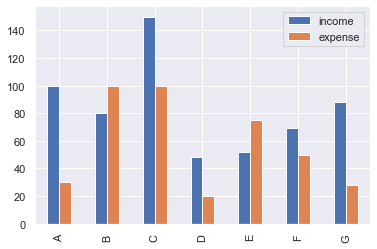

In [291]:
# Drawing bar plot from a DataFrame

df.plot(kind="bar")

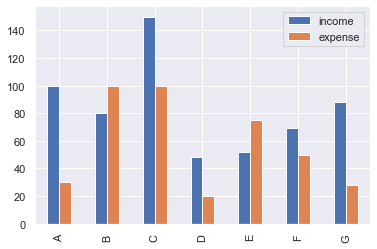

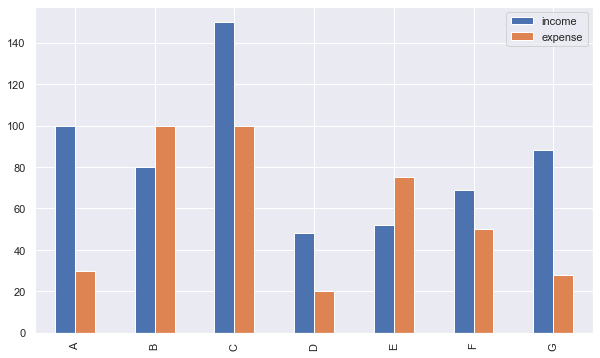

In [292]:
df.plot.bar();
df.plot(kind = "bar", figsize =(10,6));

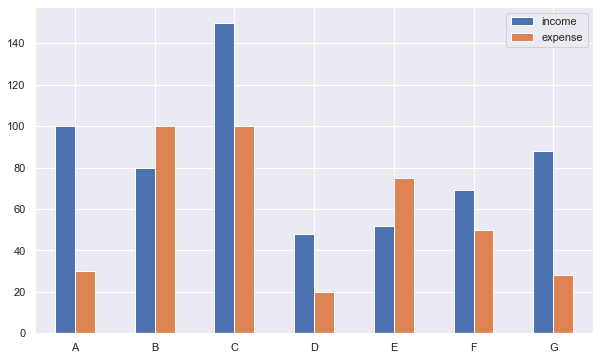

In [293]:
df.plot(kind = "bar", rot=0, figsize =(10,6));

# 3. Stack the bars

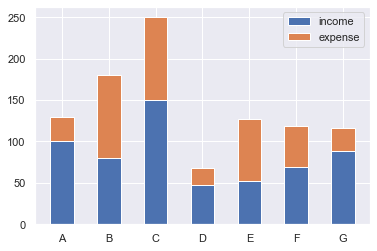

In [294]:
#Drawing stacked bar chart with matplotlib functional method

plt.bar(index, income, width=0.5, label= "income")
plt.bar(index, expense, width=0.5, bottom=income, label= "expense")
plt.legend()

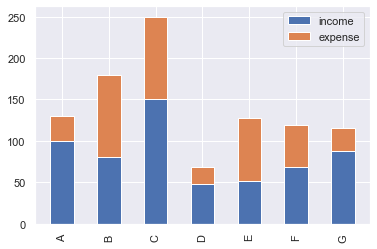

In [295]:
# Drawing stacked bar chart with Matplotlib Object Oriented Method

fig, ax=plt.subplots()

# bar width
width = 0.5

# Make the plot
ax.bar(index, income, width, label="income")
ax.bar(index, expense, width, bottom=income, label= "expense")

# Adding Xticks
ax.set_xticks(np.arange(len(index)))
ax.set_xticklabels(index, rotation=90)
plt.legend()

<AxesSubplot:>

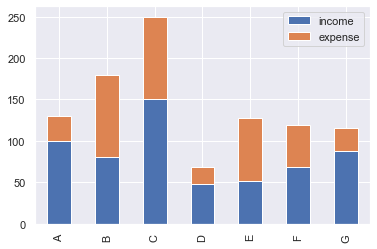

In [296]:
# Drawing Stacked Bar chart using dataframe plot

df.plot(kind="bar", stacked =True)

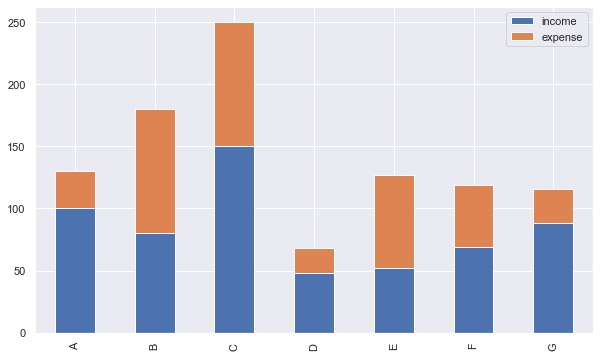

In [297]:
df.plot.bar(stacked=True, figsize=(10,6));

# 3. Rotate the labels and set figsize

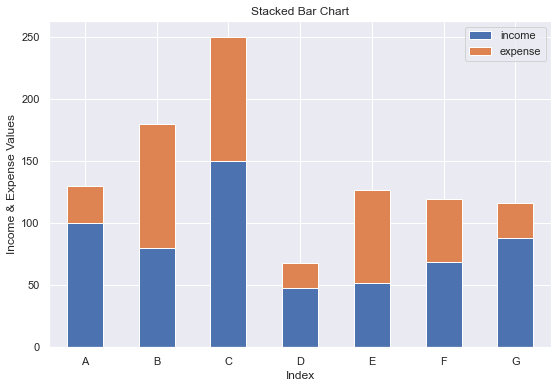

In [298]:
df.plot(kind="bar", stacked =True, figsize=(9,6), rot="horizontal", xlabel="Index", ylabel="Income & Expense Values", title="Stacked Bar Chart");

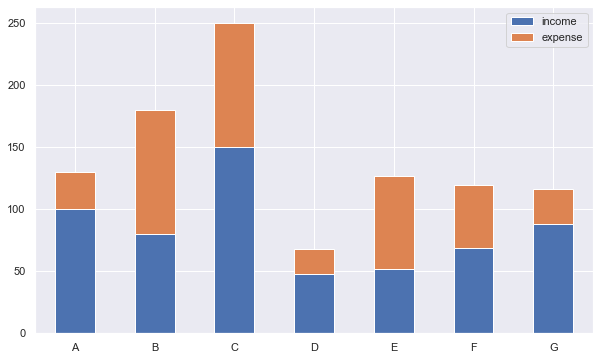

In [299]:
ax = df.plot.bar(stacked = True, figsize=(10,6))
sns.set_style(style = "darkgrid")
plt.xticks(rotation=0);

# 4. Replace the labels by "Game-1", "Game-2", "Game-3", "Game-4", "Game-5", "Game-6", "Game-7"
# 5. Unstuck the bars, annotate the hight of the bars on top of them

In [300]:
index_list = df.index
index_list

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [301]:
new_index = [f"Game-{x}" for x in np.arange(1, (len(index_list))+1)]
new_index

['Game-1', 'Game-2', 'Game-3', 'Game-4', 'Game-5', 'Game-6', 'Game-7']

In [302]:
df.index = new_index  # replacing index values with new indexes
df

,income,expense
Game-1,100,30
Game-2,80,100
Game-3,150,100
Game-4,48,20
Game-5,52,75
Game-6,69,50
Game-7,88,28


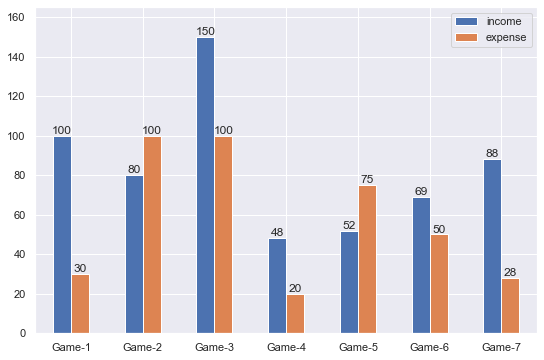

In [303]:
# first solution

# drawing unstacked bar chart with df method
ax = df.plot(kind="bar", rot="horizontal", figsize=(9,6))


# annotate to bars
ax.bar_label(ax.containers[0], label_type="edge")
ax.bar_label(ax.containers[1], label_type="edge")

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)



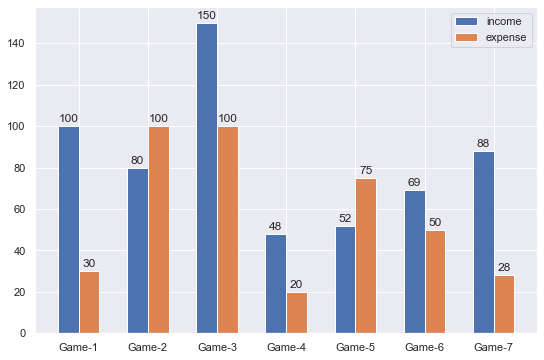

In [304]:
# second solution

# Drawing with Matplotlib Object Oriented Method

fig, ax=plt.subplots(figsize=(9,6))

# set width of bar
barWidth = 0.30

# Bar number
brnum = np.arange(len(new_index))

# Make the plot
cont1 = ax.bar(brnum - barWidth/2, income, barWidth, label="income")
cont2 = ax.bar(brnum + barWidth/2, expense, barWidth, label= "expense")

# Adding bar labels (annotate to height of the bars)
ax.bar_label(cont1, padding=2)
ax.bar_label(cont2, padding=2)

# Adding Xticks
# ax.set_xticks(brnum)
# ax.set_xticklabels(new_index)

plt.xticks(ticks=brnum, labels=new_index)  # 2. way to cahnge labels

plt.legend();

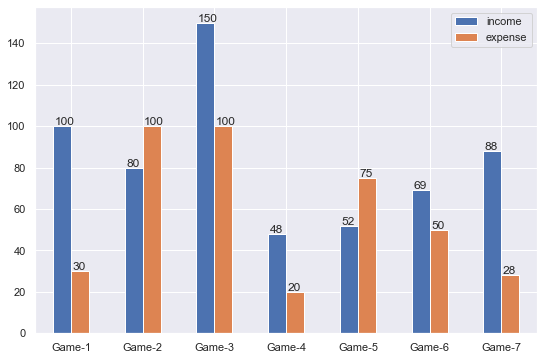

In [308]:
labels=["Game-1", "Game-2", "Game-3", "Game-4", "Game-5", "Game-6", "Game-7"]

g = df.plot.bar(figsize=(9,6), rot=0)
g.set_xticklabels(labels)
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.02, p.get_height()+0.5))


In [ ]:
## histograms

In [310]:
tips=sns.load_dataset("tips")

In [311]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 6. Histogram of the total_bill column

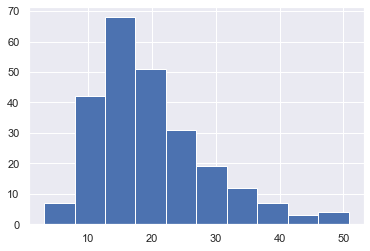

In [312]:
plt.hist(tips["total_bill"], bins=10);

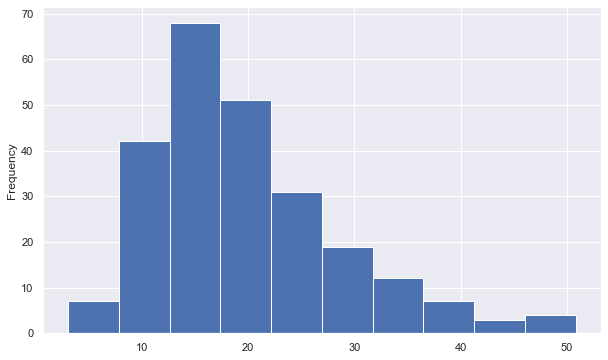

In [313]:
tips.total_bill.plot.hist(figsize=(10,6));


In [ ]:
## lineplots

In [314]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 7. Plot the avg tip by size  (lineplot)

In [315]:
x = tips.groupby("size").mean()["tip"].index
y = tips.groupby("size").mean()["tip"].values

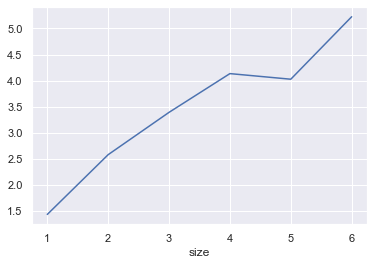

In [316]:
# plt.plot(x,y);

# veya

fig, ax=plt.subplots()

ax.plot(x,y)
ax.set_xlabel("size");

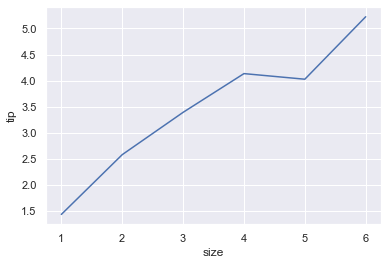

In [317]:
sns.lineplot(data=tips, x="size", y="tip", ci=None);

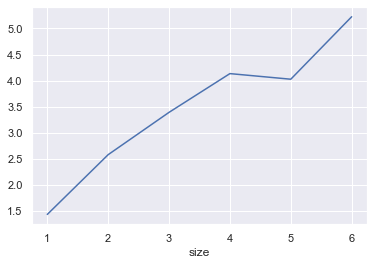

In [321]:
plt.plot(x,y);
plt.xlabel("size");

# 8.Set the linestyle as "--"

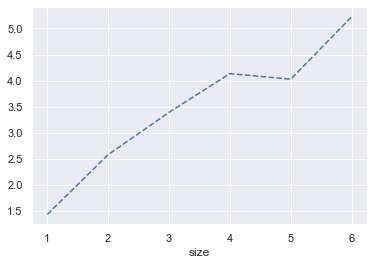

In [322]:
fig, ax=plt.subplots()

ax.plot(x,y, ls="--")
ax.set_xlabel("size");

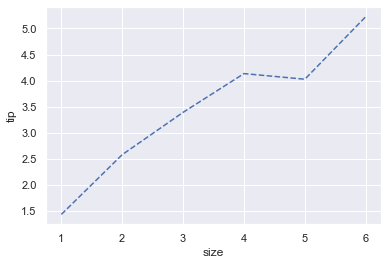

In [323]:
sns.lineplot(data=tips, x="size", y="tip", ci=None, ls="--");

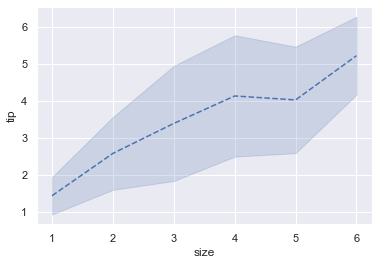

In [324]:
sns.lineplot(data=tips, x="size", y="tip", ci="sd", ls="--");  # ci:sd parametresi standart sapmaya göre aralıkları da gösterir

In [ ]:
## Scatter Plots

In [325]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 9. Make a scatter plot between tip and total_bill

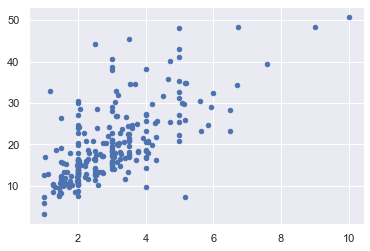

In [326]:
# plt.scatter(tips["tip"], tips["total_bill"])
# plt.xlabel("tip")
# plt.ylabel("total_bill");

fig, ax= plt.subplots()

ax.scatter(tips["tip"], tips["total_bill"], s=20);

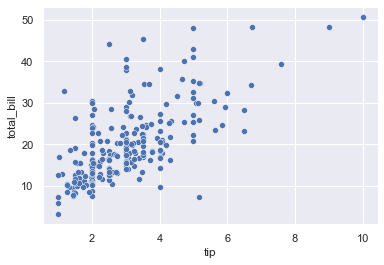

In [328]:
sns.scatterplot(data=tips, x=tips["tip"], y=tips["total_bill"]);

# 10. Set an additional dimension using size column

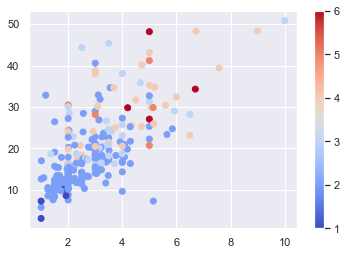

In [331]:
# fig, ax1= plt.subplots()

# ax1.scatter(tips["tip"], tips["total_bill"], c="b", s=20)
# ax2 = ax1.twinx()
# ax2.scatter(tips["tip"],tips["size"], c="r", s=20)
# ax2.set_ylim([1,6])
# # ax2.set_yticks()
# # ax2.set_yticklabels()
# fig.tight_layout();

plt.scatter(tips["tip"], tips["total_bill"], cmap="coolwarm", c=tips["size"])
plt.colorbar()
# ax2 = ax.plot(secondary_y=True)

Text(0, 0.5, 'total_bill')

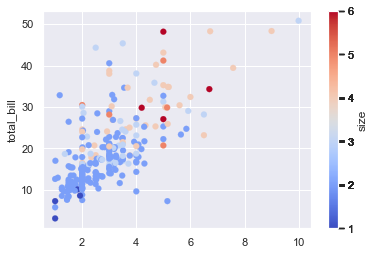

In [332]:
plt.scatter(x="tip", y="total_bill", lw=0.2, c="size", data= tips, cmap="coolwarm")
plt.colorbar(label="size", ticks=tips["size"])
plt.ylabel("total_bill")

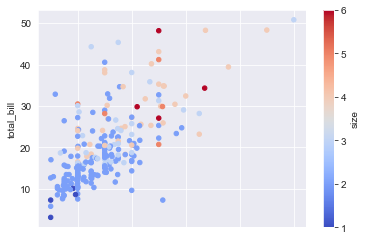

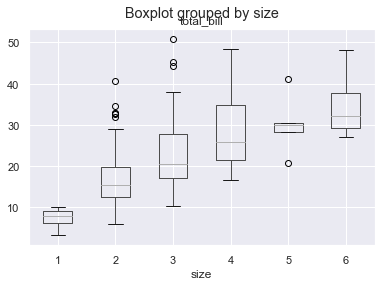

In [336]:
## boxplots

tips.boxplot(column="total_bill", by="size");

In [199]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 11. Make the same plot using seaborn

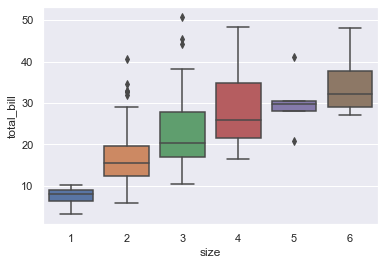

In [337]:
sns.boxplot(x=tips["size"], y=tips["total_bill"]);

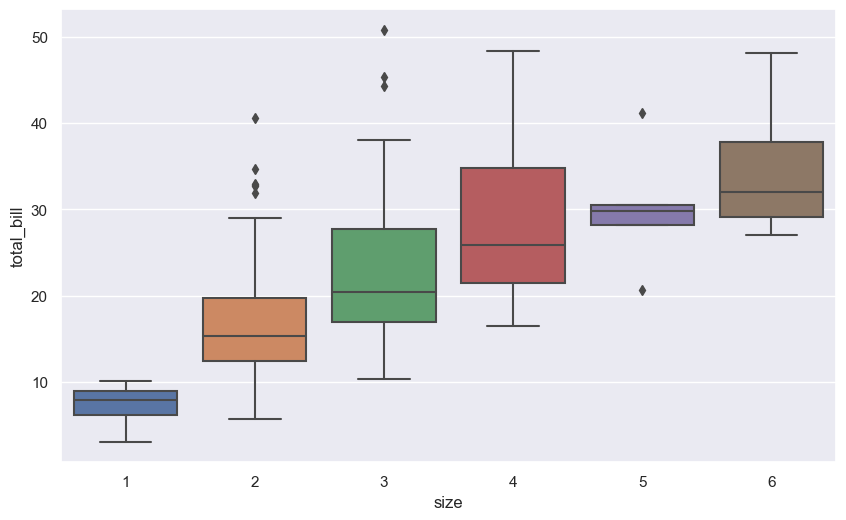

In [338]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(x=tips["size"], y=tips["total_bill"]);

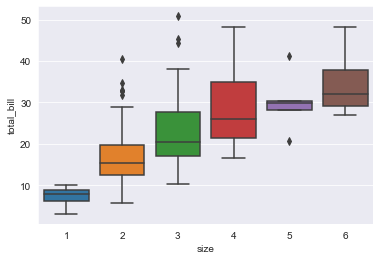

# 12. Make a violinplot instead of boxplot and discuss the difference between boxplot and violinplot

### Violinplot
Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the
distribution of quantitative data across several levels of one (or more)
categorical variables such that those distributions can be compared. Unlike
a box plot, in which all of the plot components correspond to actual
datapoints, the violin plot features a kernel density estimation of the
underlying distribution.

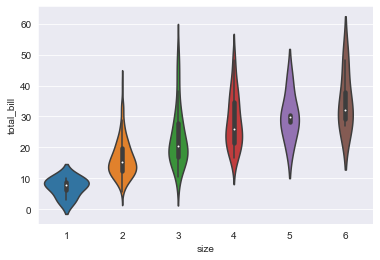

In [286]:
sns.violinplot(x=tips["size"], y=tips["total_bill"], data=tips);

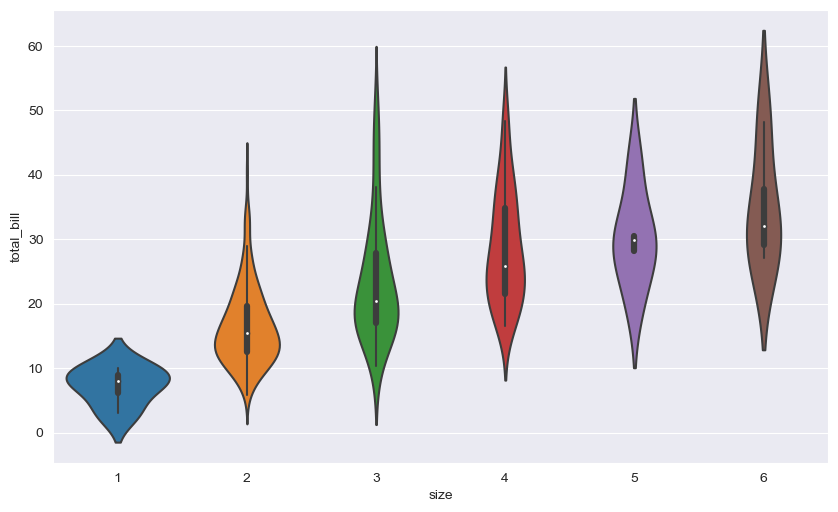

In [287]:
plt.figure(figsize=(10,6), dpi=100)
sns.violinplot(x=tips["size"], y=tips["total_bill"], data=tips);

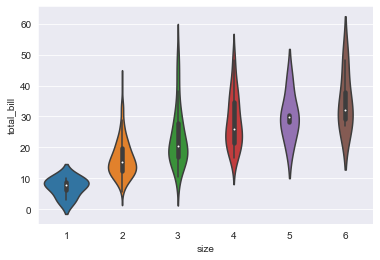

# Interview Questions

## 1. Mention few features of seaborn?

### Seaborn is a Python data visualization library based on Matplotlib.

### It provides a high-level interface for drawing attractive and informative statistical graphics.

### It works well with Pandas data DataFrame objects

### It has beautiful default styles

### Due to built on Matplotlib it can be used together with Matplotlib commands

### Easy to use

## 2. What is histograms?

### A histogram is an approximate representation of the distribution of numerical data.

## 3. What is KDE?

### İstatistikte, çekirdek yoğunluğu tahmini, rastgele bir değişkenin olasılık yoğunluk fonksiyonunu tahmin etmenin parametrik olmayan bir yoludur. Çekirdek yoğunluğu tahmini, sonlu bir veri örneğine dayalı olarak popülasyonla ilgili çıkarımların yapıldığı temel bir veri düzeltme problemidir.